# Preliminary / Background Material

###### COMP4670/8600 - Introduction to Statistical Machine Learning - Assignment 0 (due date: see the course [webpage](http://machlearn.gitlab.io/isml2017/) )

Name: Sina Eghbal

Student ID: u5544352

## Instructions

|             |Notes|
|:------------|:--|
|Maximum marks| 20|
|Weight|2% of final grade|
|Format| Complete this ipython notebook. Do not forget to fill in your name and student ID above|
|Submission mode| Use [wattle](https://wattle.anu.edu.au/)|
|Formulas| All formulas which you derive need to be explained unless you use very common mathematical facts. Picture yourself as explaining your arguments to somebody who is just learning about your assignment. With other words, do not assume that the person marking your assignment knows all the background and therefore you can just write down the formulas without any explanation. It is your task to convince the reader that you know what you are doing when you derive an argument. Typeset all formulas in $\LaTeX$.|
| Code quality | Python code should be well structured, use meaningful identifiers for variables and subroutines, and provide sufficient comments. Please refer to the examples given in the tutorials. |
| Code efficiency | An efficient implementation of an algorithm uses fast subroutines provided by the language or additional libraries. For the purpose of implementing Machine Learning algorithms in this course, that means using the appropriate data structures provided by Python and in numpy/scipy (e.g. Linear Algebra and random generators). |
| Late penalty | For every day or part thereof after the deadline of an assignment, the mark will be reduced by 5%. No assignments shall be accepted if it is later than 10 days. | 
| Coorperation | All assignments must be done individually. Cheating and plagiarism will be dealt with in accordance with University procedures (please see the ANU policies on [Academic Honesty and Plagiarism](http://academichonesty.anu.edu.au)). Hence, for example, code for programming assignments must not be developed in groups, nor should code be shared. You are encouraged to broadly discuss ideas, approaches and techniques with a few other students, but not at a level of detail where specific solutions or implementation issues are described by anyone. If you choose to consult with other students, you will include the names of your discussion partners for each solution. If you have any questions on this, please ask the lecturer before you act. |
| Solution | To be presented in the tutorials. |

$\newcommand{\dotprod}[2]{\left\langle #1, #2 \right\rangle}$
$\newcommand{\onevec}{\mathbb{1}}$

Setting up the environment

In [129]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

%matplotlib inline

# Part 1: Probability
## (4 points) 1A: Basic Rules
1. State the sum rule of probability.
- State Bayes' rule.
- Write the probability that $x\in\mathcal{S}$ where $x\sim X$ is a continuous random variable, in terms of the probability density function $f_X(x)$.
- Relate the probability density function to the cumulative distribution function $F_X(x)$.

### <span style="color:blue">Answer</span>
1.

$p(X) = \sum_{Y}^{}p(X|Y)$

$p(x) = \int_{-\inf}^{\inf}p(x, y)dy$

2.

$p(X, Y) = p(Y|X)p(X)$

$p (x, y) = p (y | x) p (x)$

3.

$p (x \in S) = {\int_Sf_X(x)dx}$

4.

$f_X(x) = \frac{dF_X(x)}{dx}$

## (2 points) 1B: Bayes' Rule (discrete random variables)
Let $X\in\{T,F\}$ be a binary random variable indicating whether a patient has a disease ($T$) or not ($F$). The (marginal or unconditional) probability of a patient having the disease is 0.01. Sick patients test positive for the disease 90% of the time. However, healthy patients test positive 5% of the time. 

1. What is the probability of having the disease if you test positive?

### <span style="color:blue">Answer</span>
$P (Disease) = \frac{1}{100}$

$P (T|Disease) = \frac {90}{100}$

$P (T|Healthy) = \frac {5}{100}$

$ P(Disease | T) = \frac {P (T|Disease)*P(Disease)}{P (T)} = \frac {90/100*1/100}{P(T | Disease)P(Disease) + P (T | Healthy)P(Healthy)}$

$ = \frac {9/1000}{90/100*1/100+5/100*99/100} = \frac {9/1000}{90/10000+99*5/10000}=\frac{90}{585}$


## (2 points) 1C: Bayes' Rule (continuous random variables)
A croupier samples a standard normal $X\sim \mathcal{N}(\mu=0,\sigma^2=1)$, and tosses a fair coin. If the coin lands on heads, she reveals to you the number $Z=X+1$. If it comes up tails she reveals $Z=X-1$. 

1. What is the probability that the number she reveals, $Z$, is greater than $a$, given that she tossed heads? 
- What is the probability she tossed heads, if the number she reveals to you is greater than $a$? 

Express the results in terms of the cumulative distribution function of the standard normal, that is $\Phi(a):=P(X<a)$.

### <span style="color:blue">Answer</span>
1. $P (Z > a | c = H) = P (X + 1 > a) = P (X > a - 1) = 1 -\phi (a - 1)$

2. $P (c = H | z > a) = \frac{P (z > a | H) P (H)}{P (Z > a)} = \frac {P (z > a | c = H)}{p (z > a | c = H)P(c = H) + p (z>a|c = T)P (c = T)} = \frac {P (X > a - 1)}{P (X + 1 > a) + P (X - 1 > a)}$

$\frac {P (X > a - 1)}{P (X > a - 1)+ P (X > a + 1)} = \frac {1 - \phi (a - 1)}{1 - \phi (a - 1) + 1 - \phi(a + 1)}$

## (5 points) 1D: Bayes Rule Simulation and Plot
1. Write a function ```theoretical_p``` which takes argument $a$ and returns the theoretical conditional probability derived previously, using ```scipy.stats.norm.cdf``` to compute $\Phi$
- Write a function ```monte_carlo_p``` which takes arguments $a$ and $n$, and which performs the croupier's sampling procedure $n$ times and returns an empirical estimate of the probability we computed above. Use the functions ```np.random.randn```, ```np.random.binomial``` and ```np.mean```. Avoid explicit loops, instead rely on the boolean index array feature of numpy.
- Plot the theoretical solution as a function of $a\in [-5,5]$ using the functions ```np.linspace``` to make a grid $1024$ of values for $a$.
- Overlay a plot of the empirical estimate with $n=500$. Label the two plots using the ```label``` argument to ```plt.plot``` along with ```plt.legend(loc='best')``` after plotting. Always label the axes in your plots. Add grid lines with ```plt.grid()```. Matplotlib accepts latex strings such as ```xlabel=r'$a$'```.

Think about the intuition behind the limiting values of the plot as $a\rightarrow-\infty$ and $a\rightarrow+\infty$.

### <span style="color:blue">Answer</span>


In [130]:
def theoretical_p (a):
    return ((1 - norm.cdf (a - 1))/ (1 - norm.cdf (a - 1) + 1 - norm.cdf (a + 1)))

In [131]:
def monte_carlo_p (a, n):
    binomial_p = np.random.binomial (n, 0.5)
    x_h = np.random.randn (binomial_p) + 1
    x_t = np.random.randn (n - binomial_p) - 1
    z_gt_a_h = np.array ([sum (x_h > elem) for elem in a])
    z_gt_a_t = np.array ([sum (x_t > elem) for elem in a])
    
    z_gt_a_h + z_gt_a_t == 0
    probabilities = np.array (z_gt_a_h/ (z_gt_a_h + z_gt_a_t))
    # probabilies = np.array([sum(x_h > elem) for elem in a])/len(a)
    return probabilities;
    # p_x_t = np.random.randn (n - binomial_p) - 1
    # population = np.concatenate ([p_x_t, p_x_h])
    
    # return np.histogram (np.concatenate ([p_x_t, p_x_h]))
    # np.mean (np.concatenate ([p_x_t + p_x_h]))

/home/sina/.local/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide


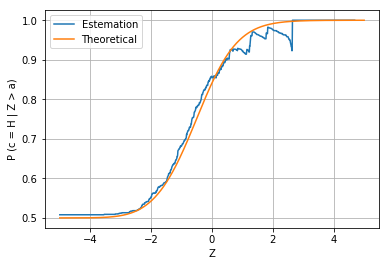

In [132]:
x = np.linspace (-5, 5, num = 1024)
plt.plot (x, monte_carlo_p (x, 500), label = "Estemation")
plt.plot(x, theoretical_p (x), label = "Theoretical")
plt.xlabel ("Z")
plt.ylabel ("P (c = H | Z > a)")
plt.legend (loc = 'best')
plt.grid ()
plt.show ()

# Part 2: Linear Algebra
## (2 Points) 2A: Linear Regression (theory)
Assume the deterministic model $y_i=\sum_{j=1}^d w_j x_{i,j}, i=1, 2, \ldots n$.
1. Write the model in matrix form using capital letters for matrices and bold lowercase for vectors, stating the dimensionality of the variables.
- Assume we observe corrupted targets $\hat{y}_i=y_i+\epsilon_i$, where $\epsilon_i$ represents unpredictable noise. Write the sum of squared errors $\sum_{i=1}^n (\sum_{j=1}^d w_j x_{i,j}-\hat{y}_i)^2$ in matrix form, and derive the vector $\mathbf{w}^\star$ which minimises it. You may wish to google <i>e.g.</i> "Sam Roweis matrix identities" and look at the section on "derivatives of scalar forms".

### <span style="color:blue">Answer</span>
1. $\mathbf{w} = \left[ \begin{array}{cccc}
w_{1}\\
w_{2}\\
\ldots\\
w_{d}\end{array} \right]\\
\mathbf{y} = [w_1 w_2 ... w_d]\left [ \begin {array} {cccc}
x_{1,1} & \ldots & x_{1,d}\\
\vdots & \ldots & \vdots\\
x_{n,1} & \ldots & x_{n,d}\end {array} \right]$
w is a vector of length d and X is a n by d matrix
2. $\mathbf{y} = X\mathbf{w}$

$E_D = (Xw-\hat{y})^2$

Since we want to minimize the error:

$\frac{dE_D}{dw} = \frac{d(Xw-\hat{y})^T(Xw-\hat{y})}{dw} = \frac{w^TX^TXw - w^TX^Ty-y^TXw+y^Ty}{dw} = 0$

$=(X^TX+X^TX)w - 2X^Ty + 0 = 0 \therefore 2X^TXw-2X^Ty = 0$

$X^TXw^* = X^Ty$

[//]: #$2X (X^Tw^* - y) = 0 \therefore XX^Tw^*-Xy = 0 \therefore (XX^T)^{-1}XX^Tw^*=(XX^T)^{-1}Xy$

[//]: #$w^* = (XX^T)^{-1}Xy$

[//]: #(%%%$w^* = (X^T)^{-1}X^{-1}Xy = (X^T)^{-1}y$)

In the event that $X^TX$ is invertible we can calculate $w^*$ using the following formula:

$w^* = (X^TX)^{-1}X^Ty$

## (3 Points) 2B: Linear Regression (python)
1. Let $d=3, n=100$ and generate $x_{i,j}, w_j$ and $\epsilon_i$ i.i.d. from $\mathcal{N}(0,1)$ using ```np.random.randn```.
- Imagine that the $w_j$ are unknown parameters, and compute them as a function of the $x_{i,j}$ and $\hat{y}_i$ using your least squares formula from the previous question. Hint: use the at symbol @ for matrix multiplication and ```np.linalg.solve``` for solving linear systems. In general explicit matrix inverse computations are to be avoided for reasons of numerical stability.
- Compare your estimated $\mathbf{w}^\star$ with the ground truth by printing them side by side.

### <span style="color:blue">Answer</span>


In [133]:
d = 3
n = 100
w = np.random.randn (d)
epsilon = np.random.rand (n)
X = np.random.randn (n,  d)
y = X@w
y_hat = y + epsilon
w_star = np.linalg.solve (np.transpose (X)@X, np.transpose (X)@y_hat)
print (w)
print (w_star)

[-1.15096376  0.8908922   1.28303764]
[-1.13510203  0.90517978  1.35188825]
